In [138]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
operations = pd.read_csv('operations.csv')
weather = pd.read_csv('Summary of Weather.csv')
station_loc = pd.read_csv('Weather Station Locations.csv')

/tmp/ipykernel_12912/4078735708.py:1: DtypeWarning: Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  operations = pd.read_csv('operations.csv')
/tmp/ipykernel_12912/4078735708.py:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv('Summary of Weather.csv')


In [140]:
operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Mission ID                             178281 non-null  int64  
 1   Mission Date                           178281 non-null  object 
 2   Theater of Operations                  175123 non-null  object 
 3   Country                                126494 non-null  object 
 4   Air Force                              126444 non-null  object 
 5   Unit ID                                50913 non-null   object 
 6   Aircraft Series                        178165 non-null  object 
 7   Callsign                               21 non-null      object 
 8   Mission Type                           47186 non-null   object 
 9   Takeoff Base                           3383 non-null    object 
 10  Takeoff Location                       3338 non-null    

In [141]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [142]:
station_loc.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [143]:
# weather stations with lat-long
weather_loc = weather.merge(station_loc, 
                            left_on='STA', 
                            right_on='WBAN', 
                            how='inner')

In [144]:
g_weather = gpd.GeoDataFrame(weather_loc)

In [145]:
# Making geographical points from lon/lat
g_weather['point'] = gpd.points_from_xy(
    x=g_weather['Longitude'],
    y=g_weather['Latitude'],
)
# geopandas needs an active geometry
g_weather.set_geometry('point')
g_weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,WTE,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude,point
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3,POINT (-0.3 5.6)
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3,POINT (-0.3 5.6)
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3,POINT (-0.3 5.6)
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3,POINT (-0.3 5.6)
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,10001,ACCRA,GH,0536N,00010W,62,5.6,-0.3,POINT (-0.3 5.6)


In [146]:
g_weather.set_geometry('point', inplace=True)

In [147]:
## Cleanup
# NOTE:
# takeoff lat/lon only included for ~1.7% of operations 
# shouldn't value it too much.

# have some country names here to clean up
# we only lose 2 rows tho, not bad. 2981 -> 2979
operations['Takeoff Latitude'] = pd.to_numeric(operations['Takeoff Latitude'], 
                                               errors='coerce')
# lose 1
operations['Takeoff Longitude'] = pd.to_numeric(operations['Takeoff Longitude'], 
                                               errors='coerce')


In [148]:
# Transofmring operations to geo
g_operations = gpd.GeoDataFrame(operations)
g_operations['takeoff'] = gpd.points_from_xy(
    x=g_operations['Takeoff Longitude'],
    y=g_operations['Takeoff Latitude']
)
g_operations['target'] = gpd.points_from_xy(
    x=g_operations['Target Longitude'],
    y=g_operations['Target Latitude']
)
# NOTE :
# any GIS operations (like finding nearest point)
# depend on the current geometry.
# Setting this here, tho it needs to be changed for analysis 
# on the takeoff point (and changed back).
g_operations.set_geometry('target', inplace=True)
g_operations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 48 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   Mission ID                             178281 non-null  int64   
 1   Mission Date                           178281 non-null  object  
 2   Theater of Operations                  175123 non-null  object  
 3   Country                                126494 non-null  object  
 4   Air Force                              126444 non-null  object  
 5   Unit ID                                50913 non-null   object  
 6   Aircraft Series                        178165 non-null  object  
 7   Callsign                               21 non-null      object  
 8   Mission Type                           47186 non-null   object  
 9   Takeoff Base                           3383 non-null    object  
 10  Takeoff Location                    

# First Maps

In [149]:
# not needed anymore
del operations
del weather
del station_loc

In [150]:
import folium
world_map = folium.Map()

In [151]:
g_operations[:10]

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID,takeoff,target
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,POINT (14.32146 37.13102),POINT (15.37 38.22)
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0,POINT (NaN NaN),POINT (147 -7.16667)
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,POINT (14.32146 37.13102),POINT (16.25 39.27)
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN,POINT (14.32146 37.13102),POINT (15.9 38.43)
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0,POINT (NaN NaN),POINT (103.88333 -1.11667)
5,6,8/15/1943,PTO,USA,5 AF,319 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,9349.0,POINT (NaN NaN),POINT (147 -7.16667)
6,7,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,12,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,11287.0,POINT (NaN NaN),POINT (147.11667 -7.01667)
7,8,8/15/1943,PTO,USA,5 AF,65 BS,B17,NaN,1,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,11326.0,POINT (NaN NaN),POINT (147.11667 -7.01667)
8,9,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,POINT (14.32146 37.13102),POINT (15.72 38.23)
9,10,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,POINT (14.32146 37.13102),POINT (15.9 38.43)


In [152]:
# restart vscode if this doesn't work
# can't map everything because it's too much

# g_operations[:10].explore(m=world_map)

In [153]:
g_operations['theater'] = g_operations['Theater of Operations']
g_operations['theater'].value_counts()

theater
ETO            95827
PTO            36192
MTO            30532
CBI            12404
EAST AFRICA      142
MADAGASCAR        26
Name: count, dtype: int64

In [154]:
# mapping just europe ??
#g_operations.loc[g_operations['theater'] == 'ETO'].explore(m=world_map)
# my computer doesn't like this

In [155]:
import geodatasets

In [156]:
euro_map = gpd.read_file(geodatasets.get_path('naturalearth.land'))

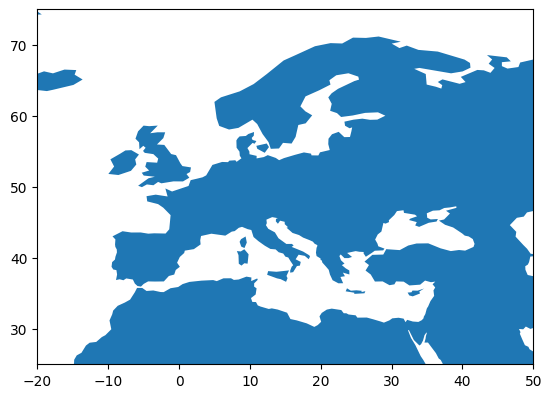

In [ ]:
fig, ax = plt.subplots()
# Important for file size, repeat on all other axes made.
ax.set_rasterized(True)

ax.set_xlim(-20, 50)
ax.set_ylim(25, 75)
euro_map.plot(ax=ax)

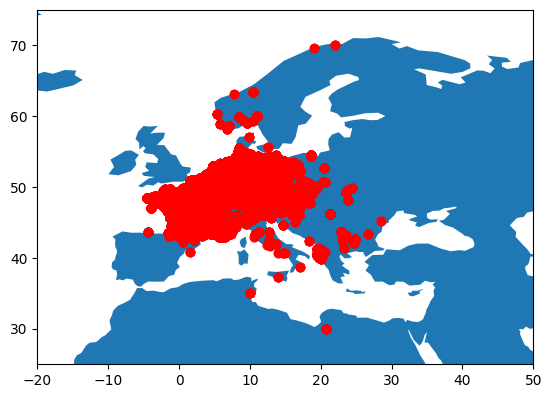

In [162]:
g_operations.loc[g_operations['theater'] == 'ETO'].plot(
    ax=ax,
    color='red'
)
#fig.show(rasterize=True)
fig

In [ ]:
#fig.savefig('operations_map.png')

# Data Transformation

In [ ]:
#how to join?
# idk

# What do we want?
# Taking the idea of if there are more bombings after bad weather : 
# We would need each bombing with the last weather reccord at that location.

# can do sjoin_nearest on geoDFs for joining them on nearest point,
# not super sure if there's a simple way to do the date thing.

# SCRAP ----

In [ ]:
scrap = pd.read_csv('operations.csv')
scrap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Mission ID                             178281 non-null  int64  
 1   Mission Date                           178281 non-null  object 
 2   Theater of Operations                  175123 non-null  object 
 3   Country                                126494 non-null  object 
 4   Air Force                              126444 non-null  object 
 5   Unit ID                                50913 non-null   object 
 6   Aircraft Series                        178165 non-null  object 
 7   Callsign                               21 non-null      object 
 8   Mission Type                           47186 non-null   object 
 9   Takeoff Base                           3383 non-null    object 
 10  Takeoff Location                       3338 non-null    

/tmp/ipykernel_12912/3435891946.py:1: DtypeWarning: Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  scrap = pd.read_csv('operations.csv')


In [ ]:
scrap['Takeoff Latitude']

0         37.131022
1               NaN
2         37.131022
3         37.131022
4               NaN
            ...    
178276          NaN
178277          NaN
178278          NaN
178279          NaN
178280          NaN
Name: Takeoff Latitude, Length: 178281, dtype: object

In [ ]:
scrap.loc[scrap['Takeoff Latitude'] == 'NEW GUINEA']['Takeoff Longitude']

133799   NaN
Name: Takeoff Longitude, dtype: float64